# VR Headset Immersion Level Prediction

### In this section, a Machine Learning model will be build in order to predict the Immersion Level of a VR headset, based on several features, including Age, Gender, VRHeadset type, Duration, and Motion Sickness.

In [161]:
# Dataset source: https://www.kaggle.com/datasets/aakashjoshi123/virtual-reality-experiences

In [235]:
# loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

In [236]:
# loading data

df = pd.read_csv('data.csv')

In [237]:
df.head(20)

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
0,1,40,Male,HTC Vive,13.598508,8,5
1,2,43,Female,HTC Vive,19.950815,2,2
2,3,27,Male,PlayStation VR,16.543387,4,2
3,4,33,Male,HTC Vive,42.574083,6,3
4,5,51,Male,PlayStation VR,22.452647,4,2
5,6,46,Other,Oculus Rift,28.284972,7,4
6,7,49,Other,Oculus Rift,52.298301,7,3
7,8,42,Other,Oculus Rift,22.959416,8,2
8,9,56,Female,PlayStation VR,16.858710,5,1
9,10,60,Male,Oculus Rift,34.470606,5,4


In [238]:
# Dropping UserID as unnecessary feature

del df['UserID']

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1000 non-null   int64  
 1   Gender          1000 non-null   object 
 2   VRHeadset       1000 non-null   object 
 3   Duration        1000 non-null   float64
 4   MotionSickness  1000 non-null   int64  
 5   ImmersionLevel  1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [240]:
# Checking statistics for numeric features
df.describe()

,Age,Duration,MotionSickness,ImmersionLevel
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.178000,32.576660,5.526000,2.976000
std,12.050208,15.764659,2.866625,1.409756
min,18.000000,5.008672,1.000000,1.000000
25%,29.000000,18.733748,3.000000,2.000000
50%,39.000000,32.368611,6.000000,3.000000
75%,49.000000,45.343732,8.000000,4.000000
max,60.000000,59.983723,10.000000,5.000000


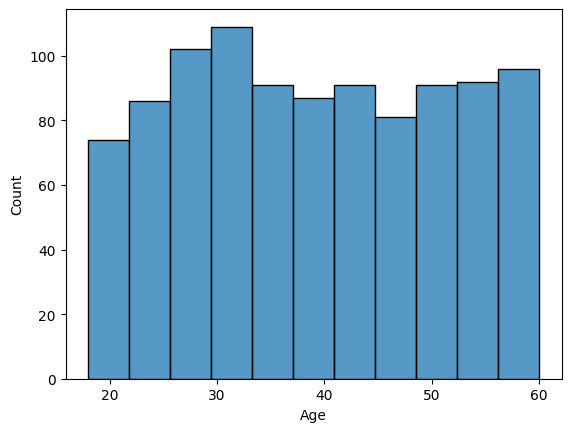

In [241]:
# Checking Age distribution

sns.histplot(data = df, x = 'Age')
plt.show()

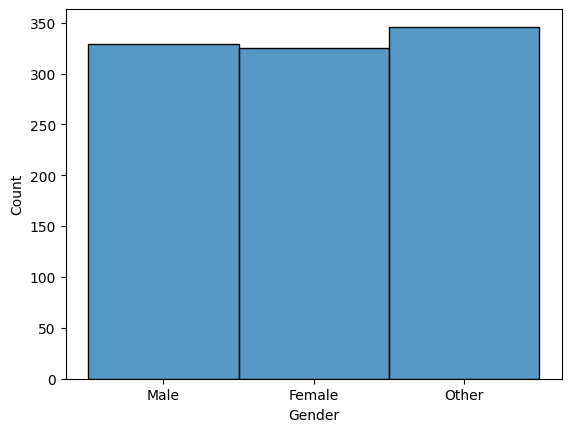

In [242]:
# Checking Gender distribution

sns.histplot(data = df, x = 'Gender')
plt.show()

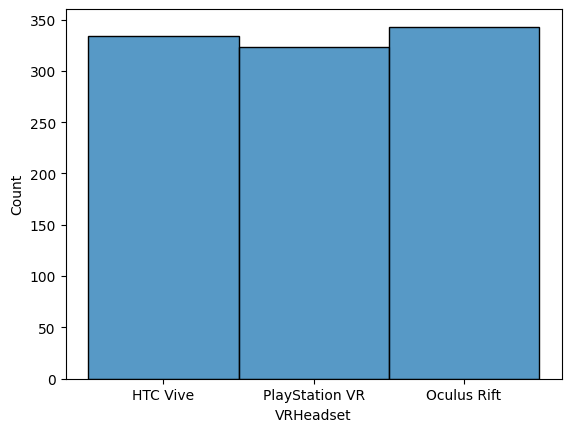

In [243]:
# Checking Headset model distribution

sns.histplot(data = df, x = 'VRHeadset')
plt.show()

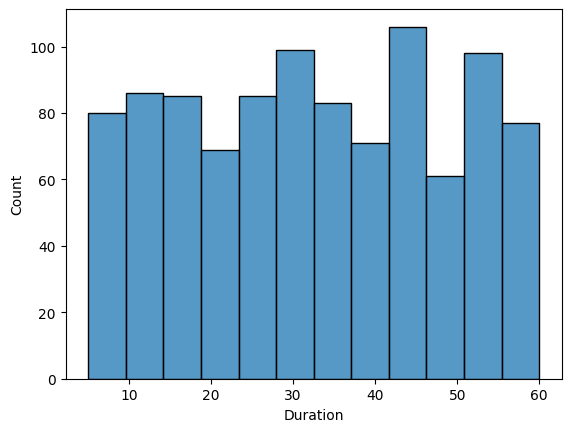

In [244]:
# Checking VR epirience duration distribution

sns.histplot(data = df, x = 'Duration', bins = 12)
plt.show()

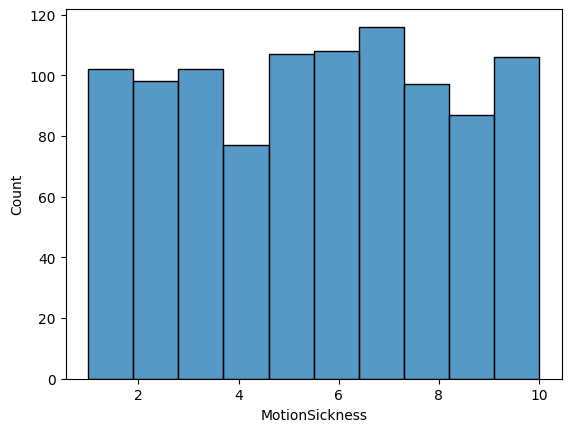

In [245]:
# Checking motion sickness distribution


sns.histplot(data = df, x = 'MotionSickness', bins = 10)
plt.show()

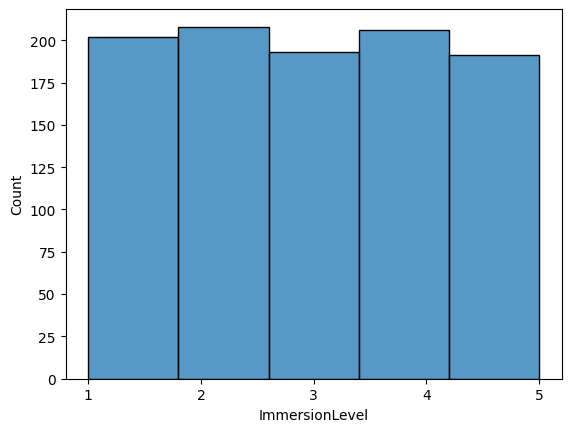

In [246]:
# Checking Immersion Level distribution

sns.histplot(data=df, x='ImmersionLevel', bins = 5)
plt.xticks(np.arange(min(df['ImmersionLevel']), max(df['ImmersionLevel'])+1, 1))
plt.show()

In [247]:
df['ImmersionLevel'].value_counts(normalize = True)

ImmersionLevel
2    0.208
4    0.206
1    0.202
3    0.193
5    0.191
Name: proportion, dtype: float64

In [248]:
# Target feature is balanced

In [250]:
# One-hot encoding the Gender and VRHeadset columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'VRHeadset'])

# Drop the original Gender and VRHeadset columns
df = df.drop(['Gender', 'VRHeadset'], axis=1)

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df_encoded, df], axis=1)

# Immersion level should start from 0 in order to run model
df["ImmersionLevel"] = df["ImmersionLevel"] - 1

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   Duration                  1000 non-null   float64
 2   MotionSickness            1000 non-null   int64  
 3   ImmersionLevel            1000 non-null   int64  
 4   Gender_Female             1000 non-null   bool   
 5   Gender_Male               1000 non-null   bool   
 6   Gender_Other              1000 non-null   bool   
 7   VRHeadset_HTC Vive        1000 non-null   bool   
 8   VRHeadset_Oculus Rift     1000 non-null   bool   
 9   VRHeadset_PlayStation VR  1000 non-null   bool   
 10  Age                       1000 non-null   int64  
 11  Duration                  1000 non-null   float64
 12  MotionSickness            1000 non-null   int64  
 13  ImmersionLevel            1000 non-null   int64  
dtypes: bool(6

In [252]:
#Getting the Independent and Dependent Features
X=df.iloc[:,0:-1] 
y=df.iloc[:,-1]

# Converting target feature to a numpy array
y = y.values.ravel()


# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify = y)

In [253]:
# Scaling the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [254]:
# Defining the number of folds for cross-validation
n_splits = 5  # You can adjust this as needed

# Creating a StratifiedKFold object
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy scores and classification reports for each fold
accuracy_scores = []
classification_reports = []

# Looping through each fold
for train_idx, val_idx in kf.split(X_train_scaled, y_train):
    # Split the data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Create and compile the model for each fold
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model for this fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=2)

    # Evaluate the model on the validation set for this fold
    y_val_pred = np.argmax(model.predict(X_val_fold), axis=1)
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    fold_classification_report = classification_report(y_val_fold, y_val_pred)

    # Store the accuracy score and classification report for this fold
    accuracy_scores.append(fold_accuracy)
    classification_reports.append(fold_classification_report)

# Calculating and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

# Printing the classification reports for each fold
for i, report in enumerate(classification_reports):
    print(f"Classification Report for Fold {i + 1}:\n", report)

Epoch 1/10
15/15 - 1s - loss: 1.5592 - accuracy: 0.2688 - 623ms/epoch - 42ms/step
Epoch 2/10
15/15 - 0s - loss: 1.3592 - accuracy: 0.4812 - 35ms/epoch - 2ms/step
Epoch 3/10
15/15 - 0s - loss: 1.1952 - accuracy: 0.5521 - 28ms/epoch - 2ms/step
Epoch 4/10
15/15 - 0s - loss: 1.0434 - accuracy: 0.6021 - 34ms/epoch - 2ms/step
Epoch 5/10
15/15 - 0s - loss: 0.9141 - accuracy: 0.6792 - 26ms/epoch - 2ms/step
Epoch 6/10
15/15 - 0s - loss: 0.8065 - accuracy: 0.7375 - 26ms/epoch - 2ms/step
Epoch 7/10
15/15 - 0s - loss: 0.7107 - accuracy: 0.8167 - 26ms/epoch - 2ms/step
Epoch 8/10
15/15 - 0s - loss: 0.6276 - accuracy: 0.8646 - 27ms/epoch - 2ms/step
Epoch 9/10
15/15 - 0s - loss: 0.5555 - accuracy: 0.9062 - 28ms/epoch - 2ms/step
Epoch 10/10
15/15 - 0s - loss: 0.4877 - accuracy: 0.9208 - 26ms/epoch - 2ms/step
4/4 [==============================] - 0s 1ms/step
Epoch 1/10
15/15 - 1s - loss: 1.5944 - accuracy: 0.2729 - 607ms/epoch - 40ms/step
Epoch 2/10
15/15 - 0s - loss: 1.3798 - accuracy: 0.5208 - 32ms/e

In [255]:
# Choosing best model

best_model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])
best_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
best_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)
y_test_pred = np.argmax(best_model.predict(X_test_scaled), axis=1)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))

Epoch 1/10
19/19 - 1s - loss: 1.5477 - accuracy: 0.3233 - 630ms/epoch - 33ms/step
Epoch 2/10
19/19 - 0s - loss: 1.3024 - accuracy: 0.5350 - 38ms/epoch - 2ms/step
Epoch 3/10
19/19 - 0s - loss: 1.1049 - accuracy: 0.5717 - 43ms/epoch - 2ms/step
Epoch 4/10
19/19 - 0s - loss: 0.9326 - accuracy: 0.6600 - 34ms/epoch - 2ms/step
Epoch 5/10
19/19 - 0s - loss: 0.7920 - accuracy: 0.7750 - 30ms/epoch - 2ms/step
Epoch 6/10
19/19 - 0s - loss: 0.6749 - accuracy: 0.8267 - 28ms/epoch - 1ms/step
Epoch 7/10
19/19 - 0s - loss: 0.5730 - accuracy: 0.9033 - 28ms/epoch - 1ms/step
Epoch 8/10
19/19 - 0s - loss: 0.4836 - accuracy: 0.9383 - 37ms/epoch - 2ms/step
Epoch 9/10
19/19 - 0s - loss: 0.4073 - accuracy: 0.9650 - 35ms/epoch - 2ms/step
Epoch 10/10
19/19 - 0s - loss: 0.3404 - accuracy: 0.9733 - 30ms/epoch - 2ms/step
13/13 [==============================] - 0s 1ms/step
Test Set Accuracy: 0.9675
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.96      0

### Summary and Conclusion

#### In this notebook, a multiclass classification task was conducted in order to predict Immersion Levels of VR headsets based on user features. I compared the performance of different machine learning models, including classic machine learning models and a deep neural network implemented using Keras.

#### After rigorous evaluation, I have found that the Keras deep learning model outperformed the classic machine learning models, achieving the highest accuracy and demonstrating better performance in predicting Immersion Levels.

#### This result highlights the power of deep learning, specifically Keras, in handling complex multiclass classification tasks. It reinforces the importance of choosing appropriate techniques and models based on the specific problem and dataset.

#### In conclusion, Keras proved to be the best choice for this multiclass classification problem, showcasing its effectiveness in achieving superior predictive accuracy.
